In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
# evenly sampled time at 50ms intervals
t = np.linspace(0., 7., 1000)

# intial values
n0=0.3;
m0=0.05;
h0=0.6;
Vm0 = -60;
aux0 = 0;
f0 = [n0,m0,h0,Vm0,aux0]

In [3]:
# define the system of ODEs via python function

def hhprop(t, f): 
    n, m, h, Vm, aux = f 
    dn_dt = (1-n)*0.01*(-50-Vm)/(np.exp((-50-Vm)/10)-1)-n*0.125*np.exp((-Vm-60)/80)
    dm_dt = (1-m)*0.1*(-35-Vm)/(np.exp((-35-Vm)/10)-1)-m*4*np.exp((-Vm-60)/18)
    dh_dt = (1-h)*0.07*np.exp((-Vm-60)/20)-h/(np.exp((-30-Vm)/10)+1)
    dVm_dt = aux
    daux_dt = -(36*(Vm+72)*(n**4)+120*(Vm-55)*(m**3)*h+0.3*(Vm-50)+1*aux)*8.483
    
    return dn_dt, dm_dt, dh_dt, dVm_dt, daux_dt

In [4]:
# solve initial value system of ODEs via scipy.integrate.solve_ivp function thorugh Runge-Kutta 45 method
# .y at end extracts results as definition of solve_ivp
n, m, h, Vm, aux = solve_ivp(hhprop,(0,7),f0, method='RK45', t_eval=t).y

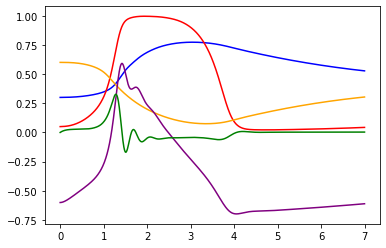

In [5]:
#simple plot
plt.plot(t, n, 'blue', t, m, 'red', t, h, 'orange', t, 0.01*Vm, 'purple', t, 0.001*aux, 'green');

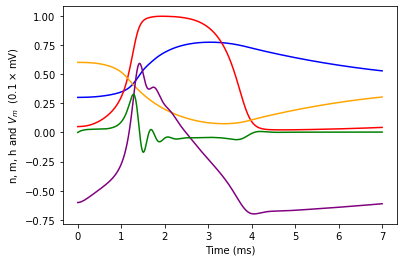

In [6]:
# plot includes lables
plt.xlabel('Time (ms)')
plt.ylabel('n, m, h and ${V_m}$  (0.1 × mV)')
plt.plot(t, n, 'blue', t, m, 'red', t, h, 'orange', t, 0.01*Vm, 'purple', t, 0.001*aux, 'green')
plt.show()

${A_{li}}^{r}{e^{za}}$